In [4]:
import pandas as pd
import krippendorff
import numpy as np

# Reload the dataset
data = pd.read_csv('../../../data/human_eval/human_eval_long.csv', encoding='utf-8')

# Convert the categorical responses to numeric
for col in ['hallucination', 'answer_acc', 'user_sat', 'coherence', 'context_qual', 'overall']:
    data[col] = data[col].map({'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5})
    

# Function to calculate Krippendorff's alpha for each dimension
def calculate_krippendorff_alpha(data, dimension):
    # Pivot the data to create a matrix where rows are items and columns are raters
    reliability_data = data.pivot(index='question_number', columns='id', values=dimension)
    # print(reliability_data.head())

    # Convert to numpy array
    reliability_matrix = reliability_data.values
    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(reliability_data=reliability_matrix, level_of_measurement='ordinal')
    return alpha

# Calculate agreement for each dimension
evaluation_columns = ['hallucination', 'answer_acc', 'user_sat', 'coherence', 'context_qual', 'overall']
agreement_results = {}

# Whole dataset
for col in evaluation_columns:
    alpha = calculate_krippendorff_alpha(data, col)
    agreement_results[col] = alpha

# Display results
print("Inter-Annotator Agreement (Krippendorff's Alpha) for each dimension:")
for dimension, alpha in agreement_results.items():
    print(f"{dimension}: {alpha:.3f}")


# German dataset only
german_data = data[data['langq'] == 'de']
german_agreement_results = {}
for col in evaluation_columns:
    alpha = calculate_krippendorff_alpha(german_data, col)
    german_agreement_results[col] = alpha

print("\nInter-Annotator Agreement (Krippendorff's Alpha) for each dimension (German dataset only):")
for dimension, alpha in german_agreement_results.items():
    print(f"{dimension}: {alpha:.3f}")


# English dataset only
english_data = data[data['langq'] == 'en']
english_agreement_results = {}
for col in evaluation_columns:
    alpha = calculate_krippendorff_alpha(english_data, col)
    english_agreement_results[col] = alpha

print("\nInter-Annotator Agreement (Krippendorff's Alpha) for each dimension (English dataset only):")
for dimension, alpha in english_agreement_results.items():
    print(f"{dimension}: {alpha:.3f}")


Inter-Annotator Agreement (Krippendorff's Alpha) for each dimension:
hallucination: 0.215
answer_acc: 0.097
user_sat: 0.108
coherence: 0.340
context_qual: 0.191
overall: 0.190

Inter-Annotator Agreement (Krippendorff's Alpha) for each dimension (German dataset only):
hallucination: 0.208
answer_acc: 0.105
user_sat: 0.087
coherence: 0.304
context_qual: 0.215
overall: 0.277

Inter-Annotator Agreement (Krippendorff's Alpha) for each dimension (English dataset only):
hallucination: 0.256
answer_acc: 0.061
user_sat: 0.120
coherence: 0.411
context_qual: 0.159
overall: 0.163


C:\Users\wurch\AppData\Local\Temp\ipykernel_47576\2526566371.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([xtick_labels[label.get_text()] for label in ax.get_xticklabels()])


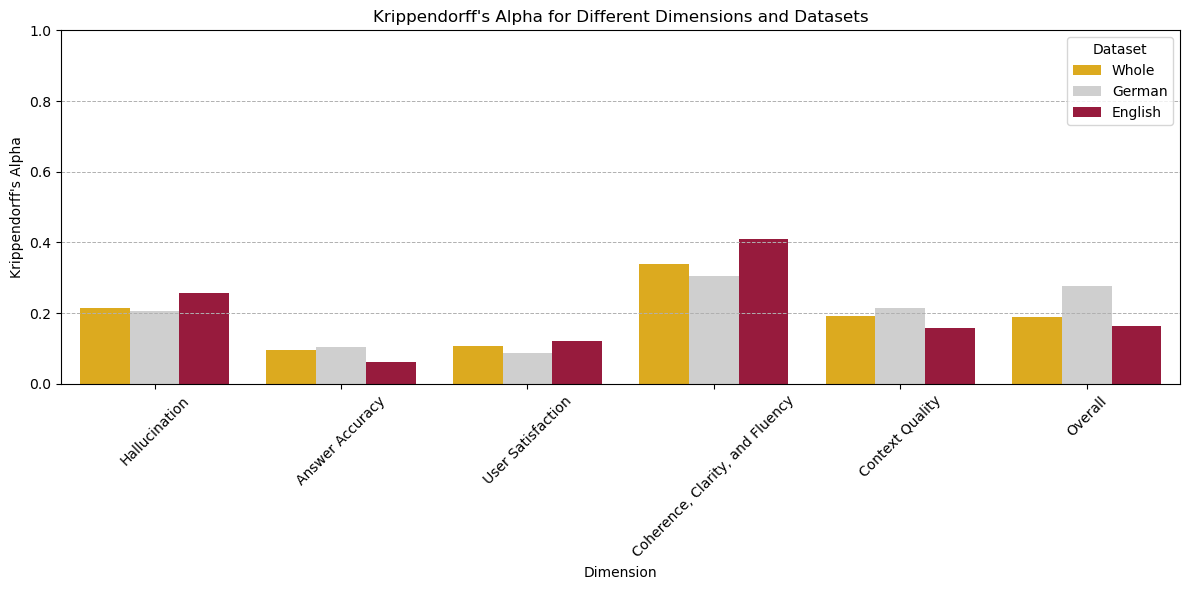

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the results into a single DataFrame
results = []
for dimension, alpha in agreement_results.items():
    results.append({'Dimension': dimension, 'Alpha': alpha, 'Dataset': 'Whole'})

for dimension, alpha in german_agreement_results.items():
    results.append({'Dimension': dimension, 'Alpha': alpha, 'Dataset': 'German'})

for dimension, alpha in english_agreement_results.items():
    results.append({'Dimension': dimension, 'Alpha': alpha, 'Dataset': 'English'})

# maybe cut and just write in thesis


results_df = pd.DataFrame(results)

# Define the color palette
palette = {'Whole': '#fbb900', 'German': '#cfcfcf', 'English': '#ac0634'}

# Define the new x-tick labels
xtick_labels = {
    'hallucination': 'Hallucination',
    'answer_acc': 'Answer Accuracy',
    'user_sat': 'User Satisfaction',
    'coherence': 'Coherence, Clarity, and Fluency',
    'context_qual': 'Context Quality',
    'overall': 'Overall',
    'Mean': 'Mean'
}

# Plot the results using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Dimension', y='Alpha', hue='Dataset', data=results_df, palette=palette)
plt.title("Krippendorff's Alpha for Different Dimensions and Datasets")
plt.ylabel("Krippendorff's Alpha")
plt.xlabel("Dimension")
plt.ylim(0, 1)
plt.legend(title='Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, which='both')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# Set the new x-tick labels
ax.set_xticklabels([xtick_labels[label.get_text()] for label in ax.get_xticklabels()])


plt.tight_layout()
plt.show()
# save plot
plt.savefig('../../../data/figures/eval_survey/krippendorff_alpha.png')